In [1]:
import sys
sys.path.append("../")
import os
import utilssphering
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
match_rep_df = pd.read_csv("../checkpoints/match_rep_df.csv")
match_rep_df

,Vendor,Batch,Plate_Map_Name,Assay_Plate_Barcode,Modality,Images_per_well,Sites-SubSampled,Binning,Magnification,Number_of_channels,...,Size_MB_std,sphering,value_95_replicating,Percent_Replicating,channel_names,brightfield_z_plane_used,feature_channels_found,Percent_Matching,value_95_matching,cell_count
0,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Widefield,4,NaN,1,10,6,...,0.000144,True,0.191908,60.000000,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.288099,2014937
1,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Widefield,4,NaN,1,10,6,...,0.000144,False,0.269727,53.333333,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",18.604651,0.320855,2014937
2,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,NaN,1,10,6,...,0.000183,True,0.269617,62.222222,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",18.604651,0.398249,2413350
3,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,NaN,1,10,6,...,0.000183,False,0.329074,45.555556,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",18.604651,0.389170,2413350
4,MolDev,Scope1_MolDev_10X_4siteZ,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crestz,Confocal,4,NaN,1,10,6,...,0.000142,True,0.205121,66.666667,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.363114,2381443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO0117059_20X,Confocal,9,4.0,1,20,6,...,0.000583,False,0.628379,20.000000,"AGP, BrightField, DNA, ER, Mito, RNA",Z08,"AGP, BrightField, DNA, ER, Mito, RNA",6.976744,0.772160,489099
358,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO01177034_20x,Confocal,9,4.0,1,20,6,...,0.000014,True,0.139090,56.666667,"AGP, BrightField, DNA, ER, Mito, RNA",Z17,"AGP, BrightField, DNA, ER, Mito, RNA",18.604651,0.193171,452567
359,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO01177034_20x,Confocal,9,4.0,1,20,6,...,0.000014,False,0.666818,21.111111,"AGP, BrightField, DNA, ER, Mito, RNA",Z17,"AGP, BrightField, DNA, ER, Mito, RNA",9.302326,0.790813,452567
360,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_40X_BRO0117059,JUMP-MOA_compound_platemap,BRO0117059_40x,Confocal,9,4.0,1,40,6,...,0.080201,True,0.193787,53.333333,"AGP, BrightField, DNA, ER, Mito, RNA",Z08,"AGP, BrightField, DNA, ER, Mito, RNA",20.930233,0.234702,116595


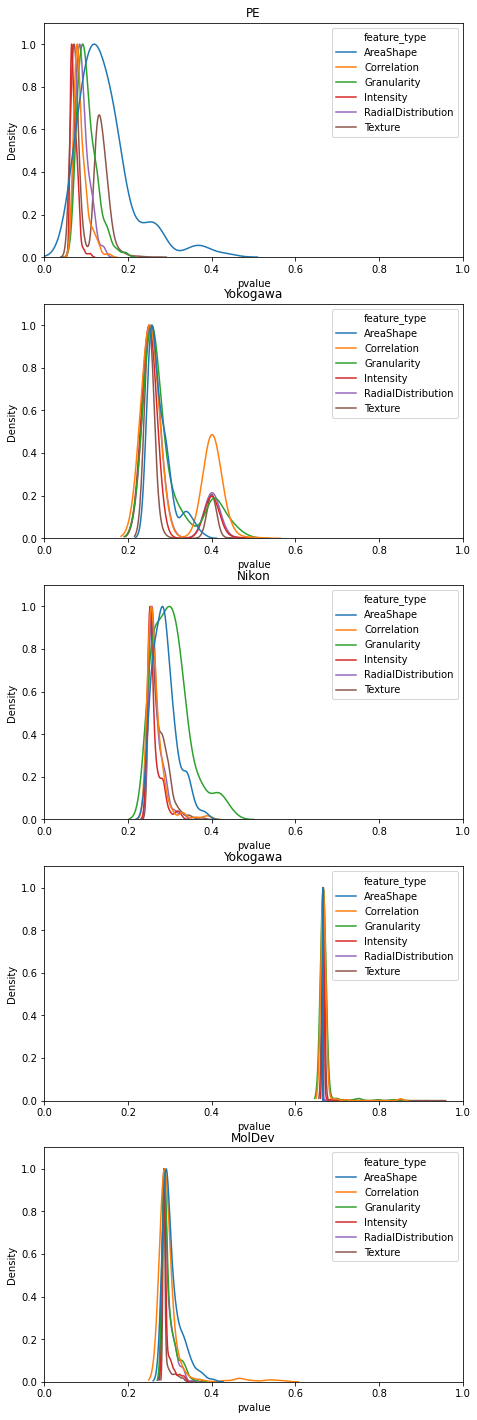

In [16]:
# Create plots for non-pixel size separated pvalues

data_dir = "../data"

comparison_paths = [os.path.join(root, file) for root, dirs, files in os.walk(data_dir) for file in files if file.endswith("all_plate_comparison.csv")]

fig, ax = plt.subplots(len(comparison_paths), figsize=(7.5, 25))

for i, pth in enumerate(comparison_paths):
    vendor_name = pth.split("/")[-1].split("_")[0]
    df = pd.read_csv(pth)
    agg_df = utilssphering.aggregate_comparison_pvalues(df, match_rep_df.columns)

    # Select columns with 'float64' dtype  
    float64_cols = list(agg_df.select_dtypes(include='float64'))
    # The same code again calling the columns. Convert to float32
    agg_df[float64_cols] = agg_df[float64_cols].astype('float32')

    kde = sns.kdeplot(
        data=agg_df, 
        x="pvalue", 
        hue="feature_type", 
        ax=ax[i], 
        # log_scale=[False, True]
        )
    
    # Normalize
    for line in kde.lines:
        y = line.get_data()[1]
        line.set_data(line.get_data()[0], y / y.max())

    ax[i].set_xlim(0, 1)
    ax[i].set_ylim(0, 1.1)
    ax[i].set_title(vendor_name)



/Users/ctromans/miniconda3/envs/jump-scope/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


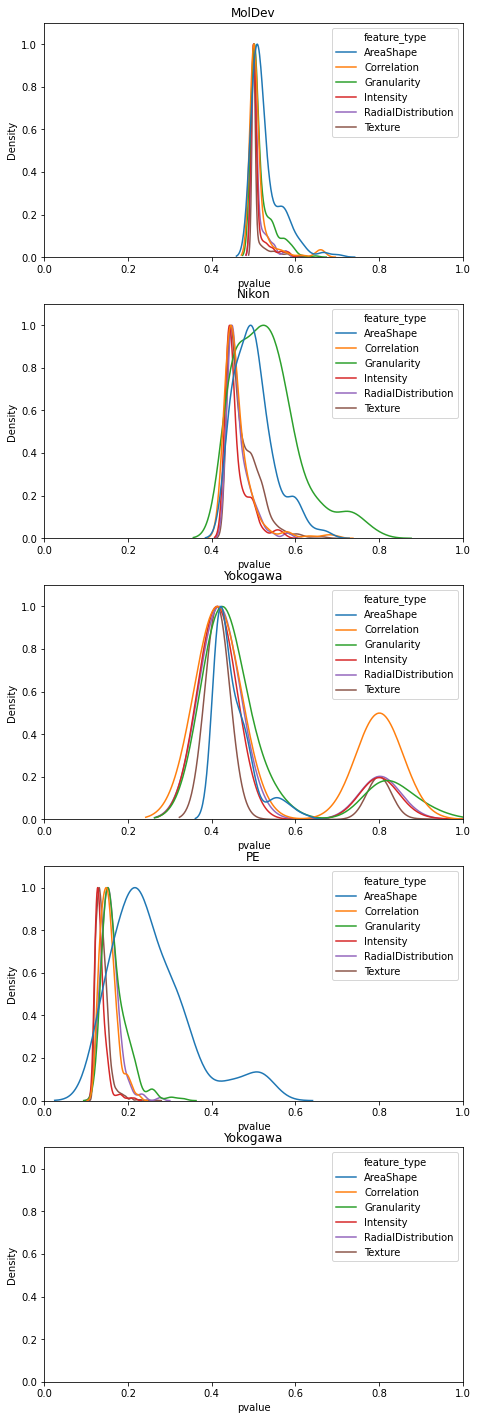

In [5]:
data_dir = "../data"

comparison_paths = [os.path.join(root, file) for root, dirs, files in os.walk(data_dir) for file in files if file.endswith("all_plate_comparison_exclude_different_mag_binning_comparison.csv")]

fig, ax = plt.subplots(len(comparison_paths), figsize=(7.5, 25))

for i, pth in enumerate(comparison_paths):
    vendor_name = pth.split("/")[-1].split("_")[0]
    df = pd.read_csv(pth)
    agg_df = utilssphering.aggregate_comparison_pvalues(df, match_rep_df.columns)

    # Select columns with 'float64' dtype  
    float64_cols = list(agg_df.select_dtypes(include='float64'))
    # The same code again calling the columns. Convert to float32
    agg_df[float64_cols] = agg_df[float64_cols].astype('float32')

    kde = sns.kdeplot(
        data=agg_df, 
        x="pvalue", 
        hue="feature_type", 
        ax=ax[i], 
        # log_scale=[False, True]
        )
    
    # Normalize
    for line in kde.lines:
        y = line.get_data()[1]
        line.set_data(line.get_data()[0], y / y.max())

    ax[i].set_xlim(0, 1)
    ax[i].set_ylim(0, 1.1)
    ax[i].set_title(vendor_name)



Text(0.5, 1.0, 'Yokogawa')

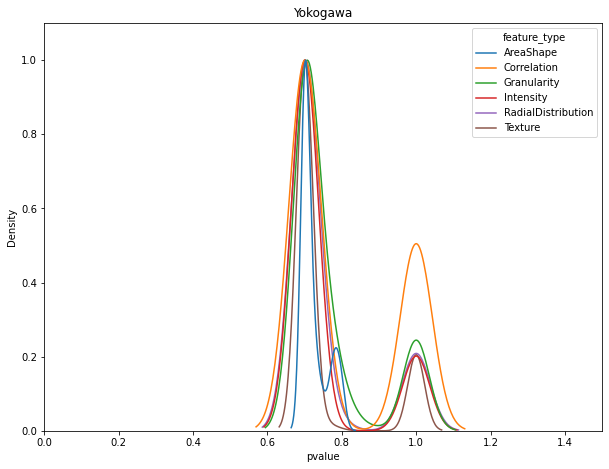

In [15]:
data_dir = "../data"

plot_df = pd.read_csv(os.path.join(data_dir, "Yokogawa_US_all_plate_comparison_exclude_different_mag_binning_comparison_exclude_simultaneous_excitation.csv"))

fig, ax = plt.subplots(figsize=(10, 7.5))

vendor_name = "Yokogawa"

agg_df = utilssphering.aggregate_comparison_pvalues(plot_df, match_rep_df.columns)

# Select columns with 'float64' dtype  
float64_cols = list(agg_df.select_dtypes(include='float64'))
# The same code again calling the columns. Convert to float32
agg_df[float64_cols] = agg_df[float64_cols].astype('float32')

kde = sns.kdeplot(
    data=agg_df, 
    x="pvalue", 
    hue="feature_type", 
    ax=ax, 
    )

# Normalize
for line in kde.lines:
    y = line.get_data()[1]
    line.set_data(line.get_data()[0], y / y.max())

ax.set_xlim(0, 1.5)
ax.set_ylim(0, 1.1)
ax.set_title(vendor_name)



In [46]:
df = pd.read_csv("/Users/ctromans/image-analysis/jump_scope/jump-scope-analysis/data/MolDev_all_plate_comparison.csv")
setting_cols = [col for col in df.columns if "_plate" in col]
setting_df = df[setting_cols]
df

,Vendor_plate1,Batch_plate1,Plate_Map_Name_plate1,Assay_Plate_Barcode_plate1,Modality_plate1,Images_per_well_plate1,Sites-SubSampled_plate1,Binning_plate1,Magnification_plate1,Number_of_channels_plate1,...,Nuclei_Texture_Variance_RNA_20_03_256_kstest_statistic,Nuclei_Texture_Variance_RNA_20_03_256_kstest_pvalue,Nuclei_Texture_Variance_RNA_5_00_256_kstest_statistic,Nuclei_Texture_Variance_RNA_5_00_256_kstest_pvalue,Nuclei_Texture_Variance_RNA_5_01_256_kstest_statistic,Nuclei_Texture_Variance_RNA_5_01_256_kstest_pvalue,Nuclei_Texture_Variance_RNA_5_02_256_kstest_statistic,Nuclei_Texture_Variance_RNA_5_02_256_kstest_pvalue,Nuclei_Texture_Variance_RNA_5_03_256_kstest_statistic,Nuclei_Texture_Variance_RNA_5_03_256_kstest_pvalue
0,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Widefield,4,NaN,1,10,6,...,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00
1,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Widefield,4,NaN,1,10,6,...,0.666667,3.287277e-81,0.661458,8.016487e-80,0.661458,8.016487e-80,0.661458,8.016487e-80,0.661458,8.016487e-80
2,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Widefield,4,NaN,1,10,6,...,0.796875,7.882975e-122,0.796875,7.882975e-122,0.796875,7.882975e-122,0.796875,7.882975e-122,0.796875,7.882975e-122
3,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Widefield,4,NaN,1,10,6,...,0.786458,4.219759e-118,0.783854,3.487656e-117,0.783854,3.487656e-117,0.783854,3.487656e-117,0.783854,3.487656e-117
4,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Widefield,4,NaN,1,10,6,...,0.765625,6.355945e-111,0.760417,3.484731e-109,0.757812,2.532987e-108,0.760417,3.484731e-109,0.757812,2.532987e-108
5,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Widefield,4,NaN,1,10,6,...,0.778646,2.288665e-115,0.781250,2.844101e-116,0.778646,2.288665e-115,0.781250,2.844101e-116,0.778646,2.288665e-115
6,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,NaN,1,10,6,...,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00
7,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,NaN,1,10,6,...,0.398438,1.301230e-27,0.398438,1.301230e-27,0.398438,1.301230e-27,0.398438,1.301230e-27,0.398438,1.301230e-27
8,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,NaN,1,10,6,...,0.528646,2.032931e-49,0.528646,2.032931e-49,0.528646,2.032931e-49,0.531250,6.257831e-50,0.531250,6.257831e-50
9,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,NaN,1,10,6,...,0.231771,1.873160e-09,0.244792,1.655246e-10,0.239583,4.441534e-10,0.244792,1.655246e-10,0.239583,4.441534e-10


In [23]:
# Find compartment pvalues 

# 1. Iterate over compartments
# 2. Subset dataset to just features of that compartment
# 3. Find features that match on the first three meausrement names and mean aggregate them
# 4. Add these new features to a separate dataframe

# df = pd.read_csv("/Users/ctromans/image-analysis/jump_scope/jump-scope-analysis/data/MolDev_all_plate_comparison_exclude_different_mag_binning_comparison.csv")
# df = pd.read_csv("/Users/ctromans/image-analysis/jump_scope/jump-scope-analysis/data/Nikon_all_plate_comparison_exclude_different_mag_binning_comparison.csv")
df = pd.read_csv("/Users/ctromans/image-analysis/jump_scope/jump-scope-analysis/data/Yokogawa_US_all_plate_comparison_exclude_different_mag_binning_comparison.csv")
# df = pd.read_csv("/Users/ctromans/image-analysis/jump_scope/jump-scope-analysis/data/PE_all_plate_comparison_exclude_different_mag_binning_comparison.csv")
# Drop the kstest_statistic col
# drop_cols = [col for col in df.columns if "kstest_statistic" in col or "_Location_" in col or "Children" in col]
drop_cols = df.columns[df.columns.str.contains("kstest_statistic|_Location_|Children|Parent|Number_Object")]

df = df.drop(columns=drop_cols)

compartments = ["Nuclei", "Cytoplasm", "Cells"]

result_df = pd.DataFrame()

for compart in compartments:
    subset_cols = [col for col in df.columns if compart in col]
    sub_df = df[subset_cols]
    # print(sub_df.columns)

    # Find the first 3 words of column names that will be used for grouping
    group_words = [col.split("_")[:3] for col in subset_cols]
    # Join them back
    group_words = ["_".join(w) for w in group_words]

    # Find the mean for the feature groups
    result_df = pd.concat([result_df, sub_df.groupby(group_words, axis=1).mean().mean(axis=0).reset_index()])

result_df = result_df.rename(columns={"index": "Feature", 0: "pvalue"})

    # Join settings if you want
    # result = setting_df.join(result)



In [24]:
sorted = result_df.sort_values(by="pvalue")

# sorted
# print(len(sorted))
# sorted[:10]
sorted[-10:]

,Feature,pvalue
2,Cytoplasm_AreaShape_BoundingBoxMaximum,0.520268
2,Cells_AreaShape_BoundingBoxMaximum,0.520268
59,Cells_Neighbors_FirstClosestDistance,0.528331
64,Nuclei_Neighbors_SecondClosestObjectNumber,0.561033
18,Cells_AreaShape_Orientation,0.562227
60,Nuclei_Neighbors_FirstClosestObjectNumber,0.563249
64,Cells_Neighbors_SecondClosestObjectNumber,0.565769
60,Cells_Neighbors_FirstClosestObjectNumber,0.567032
18,Cytoplasm_AreaShape_Orientation,0.574591
18,Nuclei_AreaShape_Orientation,0.592340
